#Assignment 1 (Project Phase 1)

##Group Name: **Data Dreamers**

##**Members**:
- **Md. Fahim Islam -> 2131059642**
- **Amit Chakraborty-> 2132692642**
- **Aditto Rahman   -> 2122332042**
- **Nahid Hassan    -> 2031269642**


- Dataset: Road Traffic Accident Dataset, Rawalpindi-Punjab, Pakistan
- Two possible targets- ***Injury Type*** or ***Patient Status***


# Imports

In [2297]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder

## Data Import

In [2298]:
df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')

<ipython-input-2298-c93f1944acf5>:1: DtypeWarning: Columns (0,1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/RTA Data 2020 to July 2023.csv')


#Selecting Our Target Variable

- For this assignment, we have selected **Injury Type** as the target variable.



In [2299]:
# Missing values
df.isnull().sum()

,0
EcYear,0
EcNumber,7211
CallTime,5956
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
HospitalName,21950
Reason,1
responsetime,5


#Droping Features



In [2300]:
df['EcNumber'].value_counts()


,count
EcNumber,
598,2
256,2
21582,2
246,2
247,2
...,...
13946,1
13949,1
13951,1


##EcNumber Correlation check

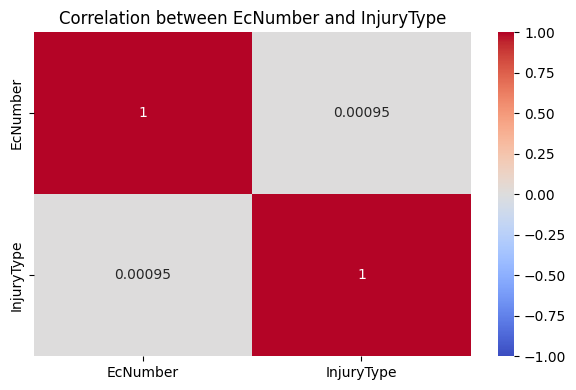

In [2301]:
df_sub = df[['EcNumber', 'InjuryType']].copy()
df_sub['EcNumber'] = df_sub['EcNumber'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)

# Calculate the correlation matrix
correlation = df_sub.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcNumber and InjuryType')
plt.tight_layout()
plt.show()


The value 0.00095 represents the correlation between EcNumber and InjuryType. A correlation of 0.00095 is extremely close to zero, meaning that there is no significant linear relationship between these two variables. That's why we deleted the EcNumber name region.

##HospitalName Correlation check

In [2302]:
df['HospitalName'].value_counts()

,count
HospitalName,
BBH,6953
DHQ,6099
PIMS,1663
"RHC,Mandra,Rawalpindi",1655
Wah General Hospital,1231
...,...
"THQ, Fateh Jang",1
"Nissa Nursing Home, Rawalpindi",1
"Nadeem Clinic, Rwp",1


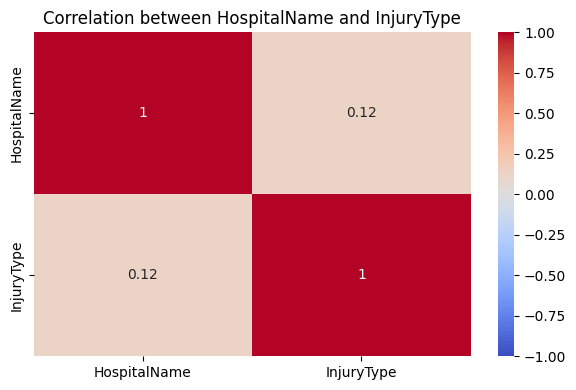

In [2303]:
df_sub = df[['HospitalName', 'InjuryType']].copy()
df_sub['HospitalName'] = df_sub['HospitalName'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)

# Calculate the correlation matrix
correlation = df_sub.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between HospitalName and InjuryType')
plt.tight_layout()
plt.show()

The correlation between HospitalName and InjuryType is 0.12, which is a very weak positive correlation. This indicates that the two variables have a very minimal linear relationship, meaning the hospital where a patient was treated has little influence on the type of injury in the data.So we will remove this column

##PatientStatus Correlation check

In [2304]:
df['PatientStatus'].value_counts()

,count
PatientStatus,
Alive & unstable,23788
Alive & stable,21812
Dead,587


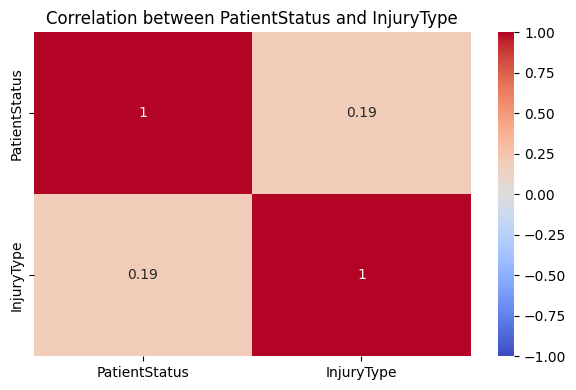

In [2305]:
df_sub = df[['PatientStatus', 'InjuryType']].copy()

df_sub['PatientStatus'] = df_sub['PatientStatus'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between PatientStatus and InjuryType')
plt.tight_layout()
plt.show()

The value 0.19 represents the correlation between PatientStatus and InjuryType. A correlation of 0.19 indicates a weak positive correlation. Although there is some relationship between these variables, it is not particularly strong. For that reason we deleted the PatientStatus column.


##CallTime Correlation check

In [2306]:
df['CallTime'].value_counts()

,count
CallTime,
1/3/21 10:07,3
9/30/20 13:35,3
12/3/20 19:58,2
10/13/20 8:36,2
9/24/22 21:07,2
...,...
8/29/21 13:23,1
8/29/21 13:07,1
8/29/21 13:04,1


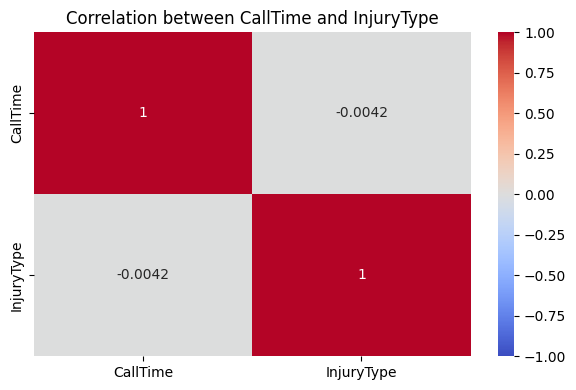

In [2307]:
df_sub = df[['CallTime', 'InjuryType']].copy()

df_sub['CallTime'] = df_sub['CallTime'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()


# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between CallTime and InjuryType')
plt.tight_layout()
plt.show()

The off-diagonal value of -0.0042 shows a very weak negative correlation between "CallTime" and "InjuryType." This means that there is almost no linear relationship between these two variables, For that reason we deleted the "CallTime" column.

##EcYear Correlation check

In [2308]:
df['EcYear'].value_counts()

,count
EcYear,
2021,12677
2020,11382
2023,9227
2022,8708
2022,4194
Hospital,1


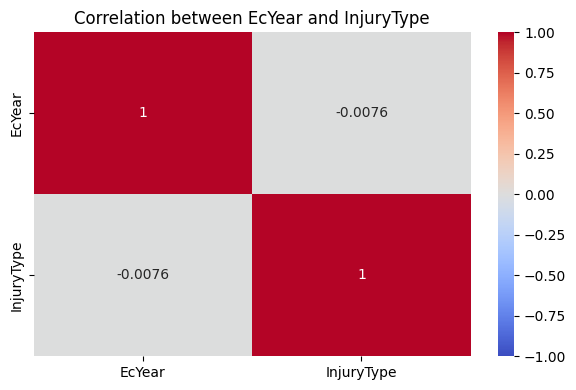

In [2309]:
df_sub = df[['EcYear', 'InjuryType']].copy()

df_sub['EcYear'] = df_sub['EcYear'].astype('category').cat.codes
df_sub['InjuryType'] = df_sub['InjuryType'].astype('category').cat.codes
df_sub.dropna(inplace=True)
correlation = df_sub.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between EcYear and InjuryType')
plt.tight_layout()
plt.show()

The off-diagonal value of -0.0076 shows a very weak negative correlation between "EcYear" and "InjuryType." This means that there is almost no linear relationship between these two variables, For that reason we deleted the "EcYear" column.

##Info About Dropping

` EcNumber, HospitalName, EcYear, PatientStatus and CallTime were removed as they do not exhibit any significant correlation with the target variable.`



In [2310]:
df = df.drop(['EcNumber', 'HospitalName', 'EcYear','PatientStatus', 'CallTime'], axis=1)

In [2311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46189 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46189 non-null  object 
 1   TotalPatientsInEmergency  46189 non-null  object 
 2   Gender                    46188 non-null  object 
 3   Age                       46188 non-null  float64
 4   Reason                    46188 non-null  object 
 5   responsetime              46184 non-null  float64
 6   EducationTitle            46188 non-null  object 
 7   InjuryType                46187 non-null  object 
 8   Cause                     46187 non-null  object 
 9   BicycleInvovled           46187 non-null  float64
 10  BikesInvolved             46187 non-null  float64
 11  BusesInvolved             46187 non-null  float64
 12  CarsInvolved              46187 non-null  float64
 13  CartInvovled              46187 non-null  float64
 14  Ricksh

#Filling the Missing Values


In [2312]:
#missing values
df.isnull().sum()

,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,1
Age,1
Reason,1
responsetime,5
EducationTitle,1
InjuryType,2
Cause,2
BicycleInvovled,2


##Handling Missing Values
`While several columns contain missing values, the number of missing entries is relatively low, with a maximum of 5 missing values in the **responseTime** column. Given the small number of missing values, it is not a significant issue. To address this, we can apply a forward fill technique, which propagates the last valid observation to the next missing one. In this case, we have opted for the forward fill method to handle the missing values efficiently.`

In [2313]:
forwardfill = [
    'Reason', 'responsetime', 'EducationTitle', 'InjuryType', 'Cause',
    'BicycleInvovled', 'BikesInvolved', 'BusesInvolved', 'CarsInvolved',
    'CartInvovled', 'RickshawsInvolved', 'TractorInvovled', 'TrainsInvovled',
    'TrucksInvolved', 'VansInvolved', 'OthersInvolved', 'Age','Gender'
]


df[forwardfill] = df[forwardfill].fillna(method='ffill')


df.isnull().sum()

<ipython-input-2313-05988a5f2a05>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[forwardfill] = df[forwardfill].fillna(method='ffill')


,0
EmergencyArea,0
TotalPatientsInEmergency,0
Gender,0
Age,0
Reason,0
responsetime,0
EducationTitle,0
InjuryType,0
Cause,0
BicycleInvovled,0


#Duplicate Value

In [2314]:
df[df.duplicated()]

,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
745,Near sehal village chakri road Rwp,4,Male,42.0,same,8.0,Matric,Minor,Carelessness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1546,Infront of ashraf marriage hall dhoke hafiz ...,3,Male,16.0,same,3.0,Matric,Minor,Over Speed,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5990,"Mohri Khadran Stop, Near Pakistan Copoperative...",6,Male,18.0,same,20.0,Primary,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6037,Near flying Club Old airport road rwp,3,Male,18.0,Same,7.0,Primary,Minor,Over Speed,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8301,Main Ali Nawaz Chowk Khatarnaak More Rawal Roa...,5,Male,17.0,same,7.0,Matric,Minor,Over Speed,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9573,Infront Of BAwali Hotel T/W Mandra GT Road Guj...,4,Male,50.0,same,6.0,Primary,Minor,U Turn,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11314,"Dhoke Muqadam Stop, Near Attock Pump/ LRBT, G ...",5,Female,45.0,Same,7.0,Middle,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12518,ranial near ranial choki chakri road rwp,4,Male,27.0,Same,8.0,Illetrate,Minor,Over Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17488,"NEAR BRIDGE,BHARIATOWN PHASE 1,NEAR SIFFARI VI...",3,Male,18.0,Same,12.0,Primary,Minor,Carelessness,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20119,"Rawal road t/w ali nawaz, rwp",5,Male,36.0,same,6.0,Illetrate,Minor,Over Speed,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [2315]:
df.duplicated().sum()

30

##Handle Duplicate value

In [2316]:
df.drop_duplicates(inplace =True)

In [2317]:
df.shape

(46159, 20)

In [2318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  object 
 7   InjuryType                46159 non-null  object 
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

#Encoding the categorical columns

##Data Type Conversion
Upon reviewing the data types in the dataframe, we observe that the following columns are of object type:

* EmergencyArea
* Gender
* Reason
* EducationTitle
* InjuryType
* Cause


Since machine learning models require numerical data, these categorical columns must be transformed into numerical format through encoding techniques. We will apply appropriate encoding methods to convert these columns into numerical values, making them suitable for analysis and modeling.

## Ordinal Encoding

In [2319]:
df['EducationTitle'].value_counts()

,count
EducationTitle,
Matric,15688
Primary,11713
Illetrate,10834
Intermediate,5673
Graduation,1684
Masters,439
Middle,118
PHD,9
0,1


###Info EducationTitle Encoding

```
For the columns EducationTitle, we will apply Ordinal Encoding,
because these features have a strong inherent order:

- EducationTitle represents educational level that follows a defined hierarchy (PhD < Master < Primary < Matric).
By using ordinal encoding, we can capture the meaningful order in these features.
```



###EducationTitle Visualization Bar chart




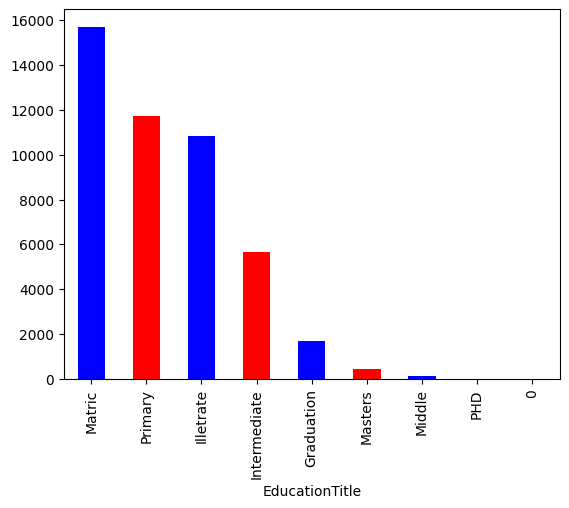

In [2320]:

df['EducationTitle'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###EducationTitle encoding

In [2321]:

encoder=OrdinalEncoder()
df['EducationTitle'] = encoder.fit_transform(df[['EducationTitle']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  object 
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

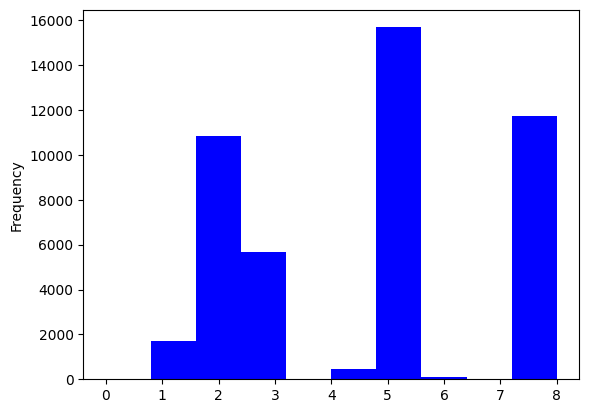

In [2322]:
df['EducationTitle'].plot(kind='hist', color=['blue'])


plt.show()

The histogram shows the distribution of EducationTitle in a dataset. It reveals that most people have education title 5, with fewer people having higher titles and even fewer having lower titles. There are also a few outliers with very high education titles.








\

###EducationTitle Visualization Box plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


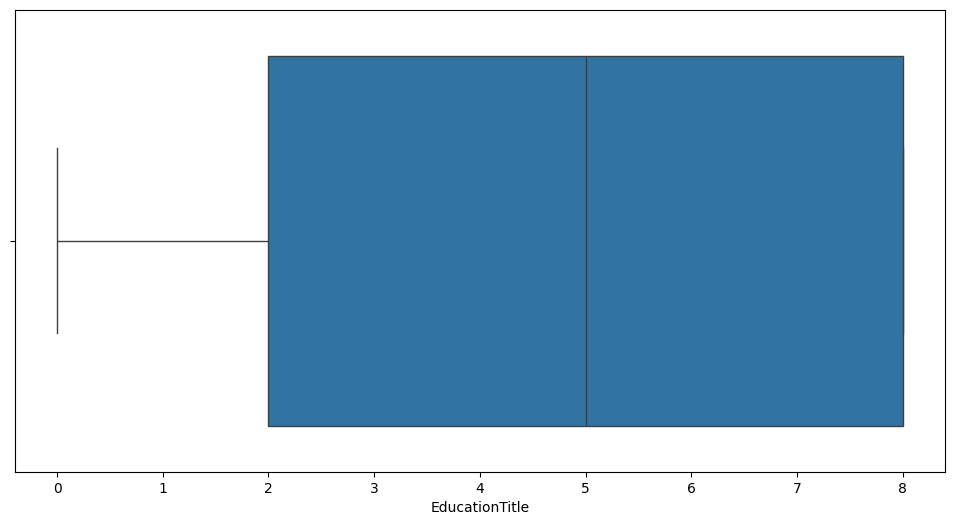

In [2323]:
#boxplot for column EducationTitle
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['EducationTitle'])

plt.show()

The median education title is 5, indicating that 50% of the individuals have an education title less than or equal to 5.

The box plot shows a slight right skew, as the whisker on the right side is longer than the whisker on the left side. This indicates that there are a few individuals with higher education titles, but the majority of individuals have lower education titles.


In [2324]:
df['InjuryType'].value_counts()

,count
InjuryType,
Minor,34765
Single Fracture,6736
Head Injury,3499
Multiple Fractures,778
Spinal Injury,381


###Info InjuryType Encoding

```
You are using ordinal encoding for "InjuryType" because this method assigns numerical values to categories based on a meaningful order.
 In the case of injury severity, there is a natural hierarchy from minor to more serious conditions. For example:

1. Minor
2. Single Fracture
3. Head Injury
4. Multiple Fractures
5. Spinal Injury

By using ordinal encoding, you can capture this ordinal relationship, where higher numbers represent more severe injuries.
```



###InjuryType Visualization Bar Chart

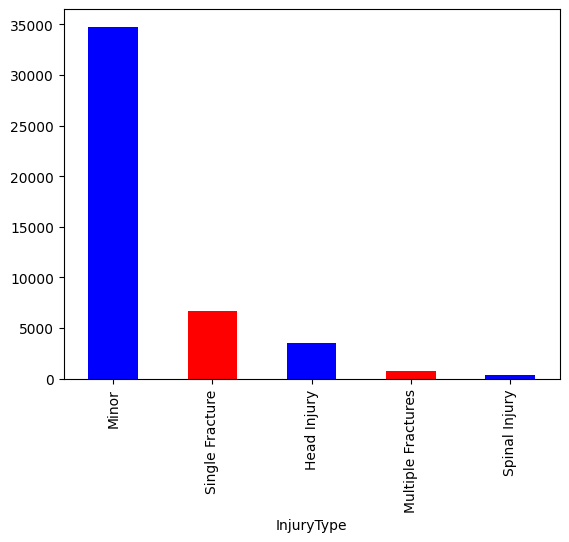

In [2325]:
df['InjuryType'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###InjuryType Encoding

In [2326]:
encoder = OrdinalEncoder()
df['InjuryType'] = encoder.fit_transform(df[['InjuryType']])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  object 
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [2327]:
df['InjuryType'].value_counts()

,count
InjuryType,
1.0,34765
3.0,6736
0.0,3499
2.0,778
4.0,381


###InjuryType Visualization histogram


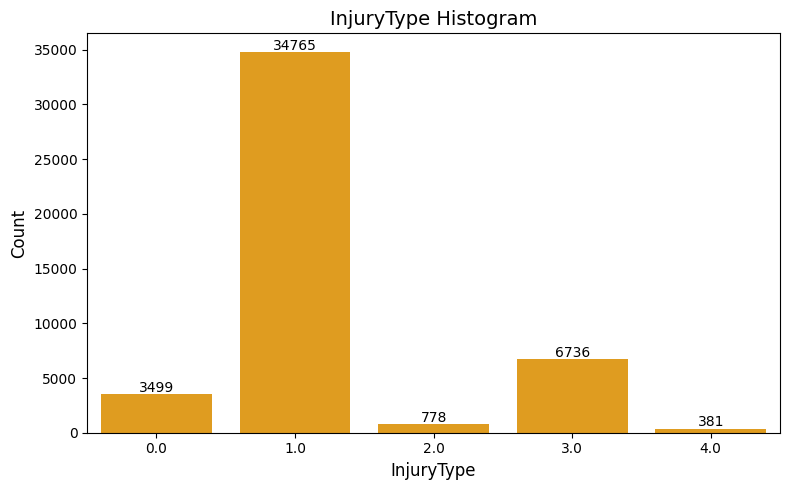

In [2328]:
injury_type =[0.0, 1.0,2.0, 3.0,  4.0]
counts =  [3499, 34765,778 ,6736 , 381]

# Set up the figure
plt.figure(figsize=(8, 5))

# Create the bar plot
sns.barplot(x=injury_type, y=counts, color="orange")

# Add title and labels
plt.title('InjuryType Histogram', fontsize=14)
plt.xlabel('InjuryType', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Display counts on top of bars
for i, count in enumerate(counts):
    plt.text(i, count + 200, f'{count}', ha='center', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


The injury type labeled "1.0" has the highest frequency, with a count of 34,765. This suggests that it is the most common type of injury in the dataset.

Less Frequent Injury Types: The injury types "0.0," "2.0," "3.0," and "4.0" have significantly lower frequencies. Specifically, "0.0" and "3.0" have counts of 3499 and 6736, respectively, while "2.0" and "4.0" have even smaller counts of 778 and 381.


##Label Encoding

In [2329]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


###Info EmergencyArea Encoding

```
The EmergencyArea column contains numerous unique locations, with varying frequencies of incidents at each.
 Label encoding was applied to convert these categorical values into numerical labels for machine learning models.
  While label encoding simplifies the data for models, it doesn't capture the significance of frequent locations.
```



###EmergencyArea Encoding

In [2330]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
"Railway Track Underpass Nazar Chowk Near Kacheri, Rwp.",42
Cod Chowk Adyala Road Rawalpindi,38
"502 Chowk, Adyala Road, Rwp",33
Near Pc Hotel Signal Mall Road Rwp,31
"22 No. Chungi Damiyal Road, Main Chowk, Rawalpindi",29
...,...
Adra Pull Abid Majeed Road Rwp,1
Jinnah Park Railway Track Rwp,1
Abid Majeed Road Front of CSD Rwp,1


In [2331]:
encoder = LabelEncoder()
df['EmergencyArea'] = encoder.fit_transform(df['EmergencyArea'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  object 
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [2332]:
df['EmergencyArea'].value_counts()

,count
EmergencyArea,
5352,42
1082,38
42,33
27523,31
16,29
...,...
8576,1
20180,1
8483,1


###EmergencyArea Visualization Box Plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


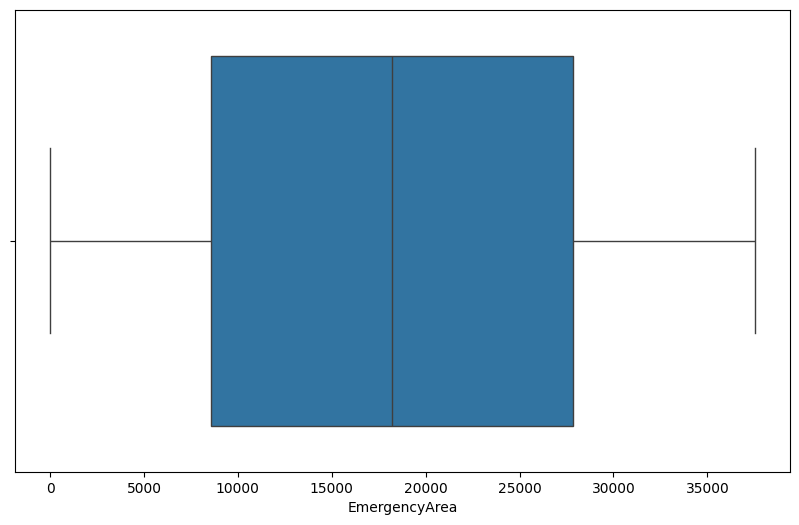

In [2333]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['EmergencyArea'])

plt.show()

 The median value, represented by the line inside the box, is approximately 20,000. This suggests that the middle 50% of the data
 points fall within the range of 10,000 to 25,000.

There are no visible outliers, as there are no data points outside of the whiskers.

###EmergencyArea Visualization Histogram

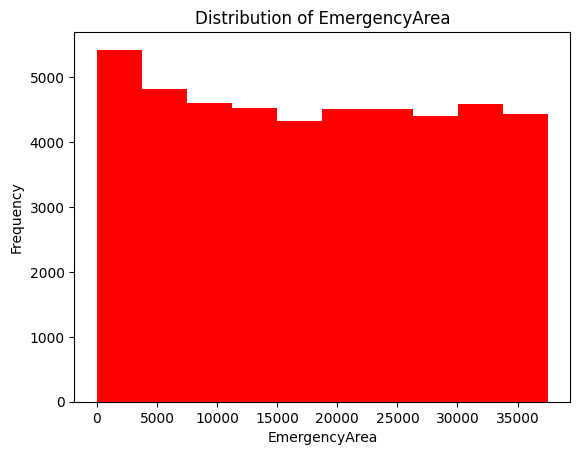

In [2334]:
df['EmergencyArea'].plot(kind='hist', color='red')
plt.title('Distribution of EmergencyArea')
plt.xlabel('EmergencyArea')
plt.ylabel('Frequency')
plt.show()


The histogram shows a relatively uniform distribution, with a consistent frequency across most of the "Emergency Area" values. There is no clear peak or skew in the data.

The range of "Emergency Area" values appears to be from approximately 0 to 35,000.

The frequency of each value seems to be around 4,000-5,000, with some minor variations.

###Info Cause Encoding




```
Label encoding is used for the Cause column to convert categorical values (e.g., "Over Speed," "Carelessness")
into numeric labels that machine learning models can process.
This is especially helpful for algorithms
like decision trees or random forests, which handle numerical data efficiently.
```



In [2335]:
df['Cause'].value_counts()

,count
Cause,
Over Speed,29567
Carelessness,14169
U Turn,933
Wrong Turn,841
Tyre Burst,481
Others,104
One Wheeling,64


###Cause Visualization Bar chart




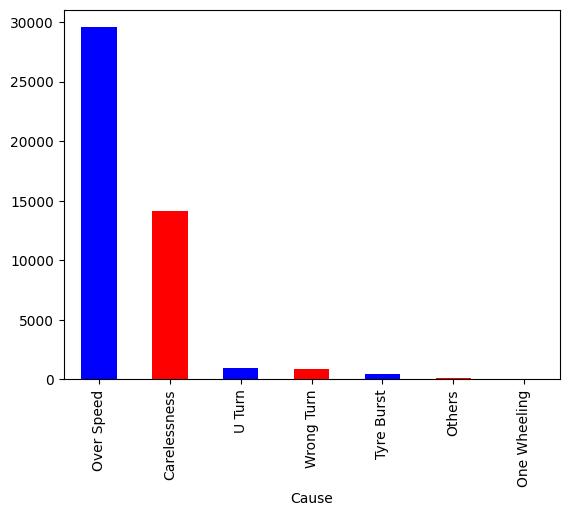

In [2336]:
df['Cause'].value_counts().plot(kind='bar', color=['blue', 'red'])


plt.show()

###Cause Label Encoding

In [2337]:
encoder = LabelEncoder()
df['Cause'] = encoder.fit_transform(df['Cause'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  object 
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  int64  
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [2338]:
df['Cause'].value_counts()

,count
Cause,
3,29567
0,14169
5,933
6,841
4,481
2,104
1,64


###Cause Visualization Histogram


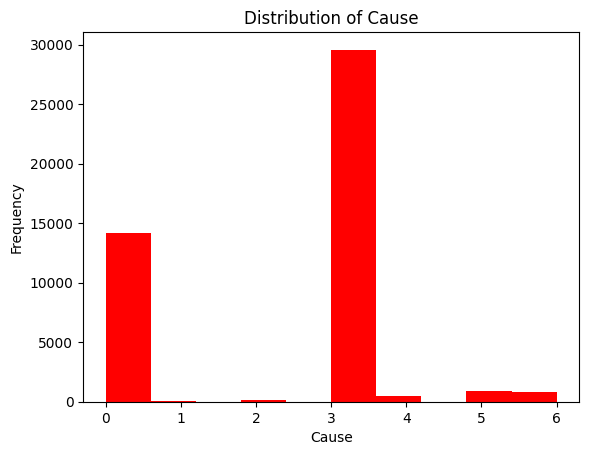

In [2339]:
df['Cause'].plot(kind='hist', color='red')
plt.title('Distribution of Cause')
plt.xlabel('Cause')
plt.show()


In [2340]:
df['Reason'].value_counts()

,count
Reason,
same,2316
Same,1314
Bike Slipped,1223
Same,1012
Bike Slip,957
...,...
Car(FD-178 Honda Swift) Hitted the pedestrian due to over speed,1
Female motor bike pa jta hoa bike slipped hony ki wajhy sy garr gei(Rin 9043),1
Car hit another car (MRAG 734) (u4156),1


###Fill 'Same' data with forward fill

In [2341]:
df['Reason'] = df['Reason'].replace(['Same', 'same','Same ','.'], pd.NA)

# Forward fill the NaN values with the value from the previous row
df['Reason'] = df['Reason'].fillna(method='ffill')

df['Reason'].value_counts()

<ipython-input-2341-a33a3e5d415d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Reason'] = df['Reason'].fillna(method='ffill')


,count
Reason,
Bike Slipped,1330
Bike Slip,1039
Bike slipped,1018
bike slipped,522
Bike hit the Pedestrian and Runaway,409
...,...
Bike slipped due to over speed (RIK 3505)Honda CD 70,1
Bike slip due to over speed (RIO # 5990),1
Motor Bike no RIK-9123 super power hit the pedistarian bike Wala moka py moujoud tha,1


###Reason Encoding

In [2342]:
encoder = LabelEncoder()
df['Reason'] = encoder.fit_transform(df['Reason'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46159 entries, 0 to 46188
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46159 non-null  int64  
 1   TotalPatientsInEmergency  46159 non-null  object 
 2   Gender                    46159 non-null  object 
 3   Age                       46159 non-null  float64
 4   Reason                    46159 non-null  int64  
 5   responsetime              46159 non-null  float64
 6   EducationTitle            46159 non-null  float64
 7   InjuryType                46159 non-null  float64
 8   Cause                     46159 non-null  int64  
 9   BicycleInvovled           46159 non-null  float64
 10  BikesInvolved             46159 non-null  float64
 11  BusesInvolved             46159 non-null  float64
 12  CarsInvolved              46159 non-null  float64
 13  CartInvovled              46159 non-null  float64
 14  RickshawsIn

In [2343]:
df['Reason'].value_counts()

,count
Reason,
11875,1330
11684,1039
14363,1018
22920,522
13088,409
...,...
4333,1
3999,1
6454,1


###Reason Visualization Box plot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


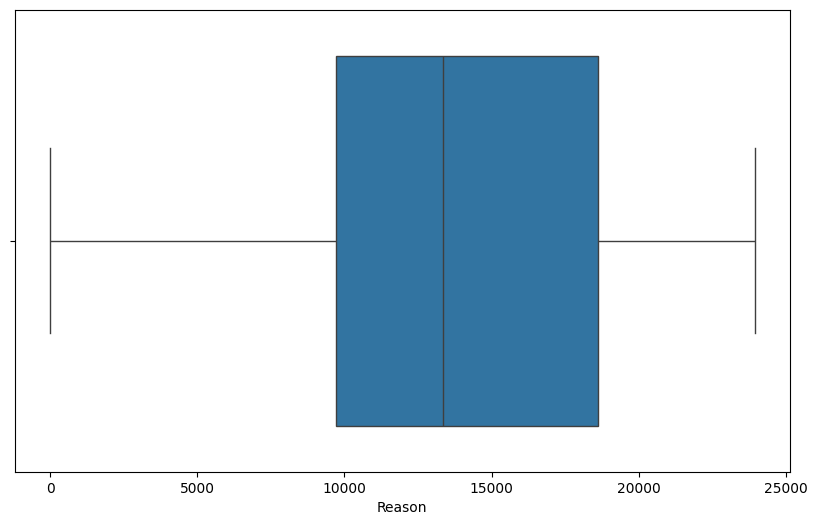

In [2344]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Reason'])

plt.show()

 The median value, represented by the line inside the box, is approximately 15,000. This suggests that the middle 50% of the data points fall within the range of 10,000 to 20,000.

There are no visible outliers, as there are no data points outside of the whiskers.


###Reason Visualization Histogram


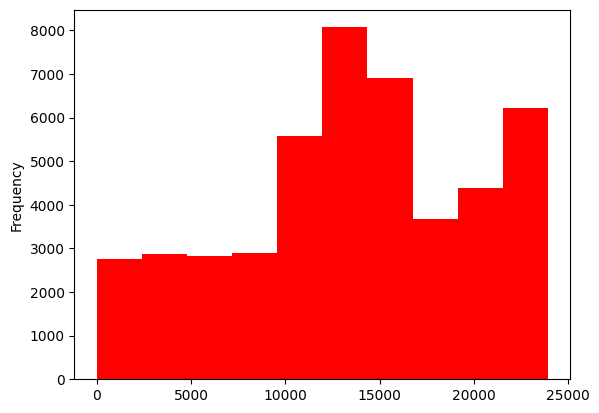

In [2345]:
df['Reason'].plot(kind='hist', color=[ 'red'])
plt.show()

The histogram shows a skewed distribution, with a peak around the values 10,000 to 15,000 and a longer tail extending towards higher values.

The range of values appears to be from approximately 0 to 25,000.


##One Hot Encoding

###Info Gender Encoding

```
We utilize one-hot encoding for Gender and Injury Type due to the lack of a coherent ordinal relationship
among their values. This technique allows us to represent categorical variables as binary vectors, ensuring that
each category is treated independently.

```



In [2346]:
df['Gender'].value_counts()



,count
Gender,
Male,39768
Female,6389
Other,1
0,1


In [2347]:
#print the '0' column whole row from gender
df[df['Gender'] == '0']



,EmergencyArea,TotalPatientsInEmergency,Gender,Age,Reason,responsetime,EducationTitle,InjuryType,Cause,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,RickshawsInvolved,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,OthersInvolved
31356,34003,Alive & unstable,0,0.0,9354,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


As the TotalPatientsInEmergency is not in perfect form same goes for Gender we can just delete this row

In [2348]:
#drop the row where Gender value is '0'
df.drop(df[df['Gender'] == '0'].index, inplace=True)
df['Gender'].value_counts()

,count
Gender,
Male,39768
Female,6389
Other,1


###Gender Visualization Pie chart


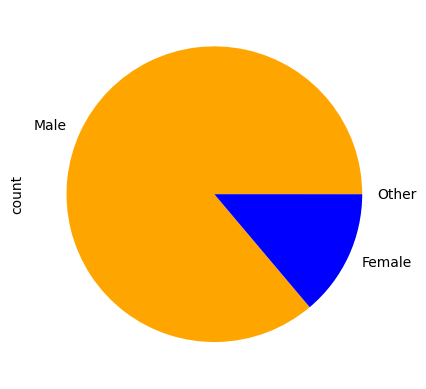

In [2349]:
df['Gender'].value_counts().plot(kind='pie', colors=['orange', 'blue','purple'])
plt.show()

###Gender Visualization Bar chart


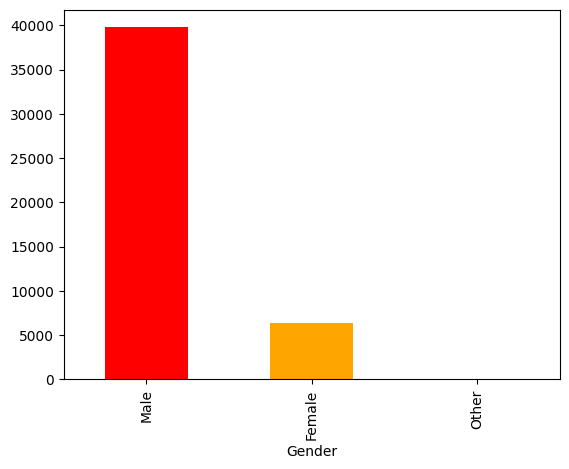

In [2350]:
df['Gender'].value_counts().plot(kind='bar', color=['red', 'orange','purple'])
plt.show()

###Gender One Hot Encode

In [2351]:
encoder = OneHotEncoder(drop=None)
arr = encoder.fit_transform(df[['Gender']]).toarray()
columns = encoder.get_feature_names_out(['Gender'])
en_df = pd.DataFrame(arr, columns=columns)
df = pd.concat([df, en_df], axis=1)

df = df.drop(['Gender'], axis=1)


df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46189 entries, 0 to 45225
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46158 non-null  float64
 1   TotalPatientsInEmergency  46158 non-null  object 
 2   Age                       46158 non-null  float64
 3   Reason                    46158 non-null  float64
 4   responsetime              46158 non-null  float64
 5   EducationTitle            46158 non-null  float64
 6   InjuryType                46158 non-null  float64
 7   Cause                     46158 non-null  float64
 8   BicycleInvovled           46158 non-null  float64
 9   BikesInvolved             46158 non-null  float64
 10  BusesInvolved             46158 non-null  float64
 11  CarsInvolved              46158 non-null  float64
 12  CartInvovled              46158 non-null  float64
 13  RickshawsInvolved         46158 non-null  float64
 14  TractorInvo

##Convert TotalPatientsInEmergency into numerical

In [2352]:
df['TotalPatientsInEmergency'].value_counts()

,count
TotalPatientsInEmergency,
1,25684
1,10467
2,5177
2,2136
3,1119
3,448
4,361
5,184
4,117


In [2353]:
df['TotalPatientsInEmergency'] = df['TotalPatientsInEmergency'].astype(float)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 46189 entries, 0 to 45225
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmergencyArea             46158 non-null  float64
 1   TotalPatientsInEmergency  46158 non-null  float64
 2   Age                       46158 non-null  float64
 3   Reason                    46158 non-null  float64
 4   responsetime              46158 non-null  float64
 5   EducationTitle            46158 non-null  float64
 6   InjuryType                46158 non-null  float64
 7   Cause                     46158 non-null  float64
 8   BicycleInvovled           46158 non-null  float64
 9   BikesInvolved             46158 non-null  float64
 10  BusesInvolved             46158 non-null  float64
 11  CarsInvolved              46158 non-null  float64
 12  CartInvovled              46158 non-null  float64
 13  RickshawsInvolved         46158 non-null  float64
 14  TractorInvo

###TotalPatientEmergency Visualization Histogram


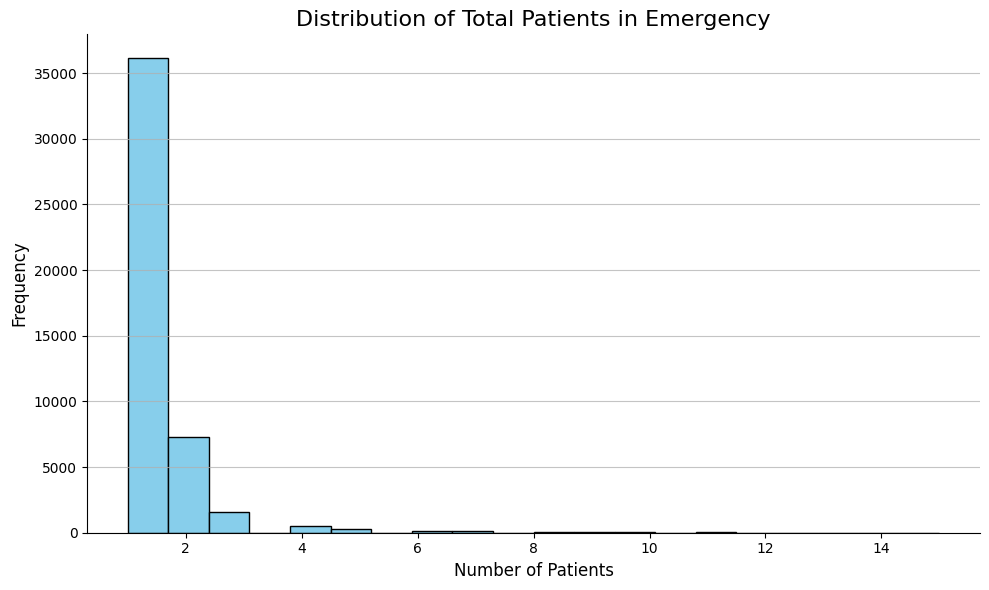

In [2354]:
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPatientsInEmergency'], bins=20, color='skyblue', edgecolor='black')

# Title and labels
plt.title('Distribution of Total Patients in Emergency', fontsize=16)
plt.xlabel('Number of Patients', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Optional: Add grid and adjust spines
plt.grid(axis='y', alpha=0.75)
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

 The distribution is heavily skewed to the right, with a long tail extending towards higher numbers of patients. This indicates that there are a few instances with a very large number of patients, which significantly impacts the overall distribution.

# **why we should do feature scalling after spliting dataset into train and test set?**

***Feature scaling should be performed after splitting the dataset into training and test sets to avoid data leakage and ensure fair model evaluation. If scaling is done before the split, information from the test set (like the mean or range of values) could influence the scaling process, which leads to overfitting and artificially inflated performance metrics. By scaling only the training data and applying the same transformation to the test set, the model is evaluated on truly unseen data, providing a more realistic measure of its generalization ability. This approach mimics real-world scenarios where future data must be scaled consistently with the training data.***

#Split Into Train and Test Sets

In [2355]:
#Define the feature columns exclude  the target columns
feature_columns = df.columns.difference(df['InjuryType'])

#Create feature X and target Y
X = df[feature_columns]
Y = df['InjuryType']

#Perform train-test split (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [2356]:
X_train.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
8939,58.0,0.0,2.0,0.0,0.0,0.0,3.0,5.0,23096.0,1.0,...,1.0,0.0,23836.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0
30910,5.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1944.0,0.0,...,1.0,0.0,9605.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0


In [2357]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (36951, 22)
X_test shape: (9238, 22)
Y_train shape: (36951,)
Y_test shape: (9238,)


#Feature Scalling

##Info



```
Since we have not yet determined which model to use,
we cannot apply a specific method for feature scaling.
 Different models perform optimally with either normalization or standardization, so it is essential to identify the appropriate
 model before deciding on the most effective scaling technique.
```



###Standardization


In [2358]:
scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns)



In [2359]:
X_train_scaled.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,1.675994,-0.093361,1.788572,-0.091388,-0.523505,-0.044813,0.534702,0.147338,0.441653,2.483486,...,-0.314266,-0.098833,1.633360,-0.301169,1.862089,-0.098669,-0.046889,-0.204155,-0.350658,-0.866401
1,-1.806093,-0.093361,-1.669171,-0.091388,-0.523505,-0.044813,0.534702,-1.147113,-1.480238,-0.402660,...,-0.314266,-0.098833,-0.630105,-0.301169,-0.379277,-0.098669,-0.046889,-0.204155,2.631916,0.147036


In [2360]:
X_test_scaled.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,1.216096,-0.093361,0.059700,-0.091388,-0.523505,-0.044813,0.534702,0.147338,0.103650,-0.40266,...,2.088394,-0.098833,-0.149133,-0.301169,-0.379277,-0.098669,-0.046889,-0.204155,-0.350658,-0.461026
1,-0.886296,-0.093361,1.788572,-0.091388,-0.523505,-0.044813,0.534702,0.147338,1.146461,-0.40266,...,-0.314266,-0.098833,1.160499,-0.301169,1.862089,-0.098669,-0.046889,-0.204155,-0.350658,-0.461026


###Min-Max Scalling



In [2361]:
scaler = MinMaxScaler()


X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)


X_train_minmax = pd.DataFrame(X_train_minmax, columns=feature_columns)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=feature_columns)



In [2362]:
X_train_minmax.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.491525,0.0,0.2,0.0,0.0,0.0,0.5,0.571429,0.615581,1.0,...,0.25,0.0,0.995864,0.0,0.142857,0.0,0.0,0.0,0.00,0.01
1,0.042373,0.0,0.0,0.0,0.0,0.0,0.5,0.142857,0.051814,0.0,...,0.25,0.0,0.401295,0.0,0.000000,0.0,0.0,0.0,0.25,0.06


In [2363]:
X_test_minmax.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.432203,0.0,0.1,0.0,0.0,0.0,0.5,0.571429,0.516432,0.0,...,0.75,0.0,0.527637,0.0,0.000000,0.0,0.0,0.0,0.0,0.03
1,0.161017,0.0,0.2,0.0,0.0,0.0,0.5,0.571429,0.822330,0.0,...,0.25,0.0,0.871652,0.0,0.142857,0.0,0.0,0.0,0.0,0.03


###Normalization

In [2364]:
from sklearn.preprocessing import Normalizer
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


normalizer = Normalizer(norm='l1')


X_train_normalized = normalizer.fit_transform(X_train_imputed)
X_test_normalized = normalizer.transform(X_test_imputed)


X_train_normalized = pd.DataFrame(X_train_normalized, columns=feature_columns)
X_test_normalized = pd.DataFrame(X_test_normalized, columns=feature_columns)

In [2365]:
X_train_normalized.head(2)


,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.001234,0.0,0.000043,0.0,0.0,0.0,0.000064,0.000106,0.491331,0.000021,...,0.000021,0.0,0.507073,0.0,0.000064,0.0,0.0,0.0,0.000000,0.000043
1,0.000432,0.0,0.000000,0.0,0.0,0.0,0.000259,0.000173,0.168021,0.000000,...,0.000086,0.0,0.830164,0.0,0.000086,0.0,0.0,0.0,0.000086,0.000605


In [2366]:
X_test_normalized.head(2)

,Age,BicycleInvovled,BikesInvolved,BusesInvolved,CarsInvolved,CartInvovled,Cause,EducationTitle,EmergencyArea,Gender_Female,...,InjuryType,OthersInvolved,Reason,RickshawsInvolved,TotalPatientsInEmergency,TractorInvovled,TrainsInvovled,TrucksInvolved,VansInvolved,responsetime
0,0.001590,0.0,0.000031,0.0,0.0,0.0,0.000094,0.000156,0.604103,0.0,...,0.000094,0.0,0.393746,0.0,0.000031,0.0,0.0,0.0,0.0,0.000125
1,0.000367,0.0,0.000039,0.0,0.0,0.0,0.000058,0.000097,0.596147,0.0,...,0.000019,0.0,0.403119,0.0,0.000058,0.0,0.0,0.0,0.0,0.000077
